In [2]:
import csv
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

In [3]:
# Read in app reviews
pd.set_option("display.max_columns", None)
review_df_orig = pd.read_csv("./DataMiningProjectData/steam_apps_reviews.csv")

In [4]:
# Drop review id
review_df = review_df_orig.copy()
review_df = review_df.drop("review_id", axis=1)
review_df.head()

,steam_app_id,playtime_at_review,review
0,2532180,12.0,"I'll be giving this game a thumbs up for now, ..."
1,2532230,23.0,Me and my friends were not even able to play t...
2,2532230,36.0,Stop crashing my game it's making me angry
3,2532230,125.0,"The game is good, but sometimes it can be hard..."
4,2532230,71.0,"This game is quite promising, the main issues ..."


In [5]:
# Read in the steam app info. Create an accurate total_reviews column
info_df = pd.read_csv("./DataMiningProjectData/steam_apps_info.csv")
app_names = info_df["steam_app_name"].tolist()
info_df = info_df.drop(["description", "price", "price_currency", "categores", "platforms",
                       "developer_id", "publisher_id", "total_reviews"], axis=1)
info_df["total_reviews"] = info_df["total_positive_reviews"] + info_df["total_negative_reviews"]
info_df

,steam_app_id,steam_app_name,app_type,total_positive_reviews,total_negative_reviews,genres,total_reviews
0,2532180,DEAD END MISSION,game,1,0,"['Action', 'Adventure']",1
1,2532230,SCP: Nemesi - Alpha Testing,game,34,15,"['Action', 'Indie', 'Early Access']",49
2,2532300,The Weird Dream,game,5,0,"['Action', 'Adventure']",5
3,2532310,Line Link,game,1,0,"['Casual', 'Indie']",1
4,2532360,Point Salad - The Board Game,game,3,1,"['Casual', 'Indie', 'Strategy']",4
...,...,...,...,...,...,...,...
25775,691540,Space Fighter,game,45,27,"['Action', 'Free To Play']",72
25776,691570,Wingless,game,3,0,"['Action', 'Casual', 'Indie']",3
25777,691580,"Maggie's Movies - Camera, Action!",game,9,2,"['Adventure', 'Casual', 'Indie', 'Simulation']",11
25778,690690,NEUTRANS,game,4,2,['Utilities'],6


In [6]:
info_df = info_df.drop("steam_app_name", axis=1)

In [7]:
app_names = [str(name) for name in app_names]
app_names = [name.split() for name in app_names]
app_names = [name.lower() for namelist in app_names for name in namelist]
app_names

['dead',
 'end',
 'mission',
 'scp:',
 'nemesi',
 '-',
 'alpha',
 'testing',
 'the',
 'weird',
 'dream',
 'line',
 'link',
 'point',
 'salad',
 '-',
 'the',
 'board',
 'game',
 'thehunter:',
 'call',
 'of',
 'the',
 'wild™',
 '-',
 'ambusher',
 'pack',
 'supernormal',
 'formilion',
 'drums',
 'rock:',
 'undertale',
 '-',
 "'megalovania'",
 'drums',
 'rock:',
 'undertale',
 '-',
 "'hopes",
 'and',
 "dreams'",
 'lizards',
 'must',
 'die',
 'project',
 'arcade',
 'wild',
 'card',
 'football',
 '-',
 'season',
 'pass',
 'rpg',
 'maker',
 'mv',
 '-',
 'winlu',
 'fantasy',
 'tileset',
 '-',
 'overworld',
 'rpg',
 'maker',
 'mz',
 '-',
 'winlu',
 'fantasy',
 'tileset',
 '-',
 'overworld',
 'rpg',
 'maker',
 'mz',
 '-',
 'another',
 'world',
 'heroine',
 'generator',
 'dx',
 'for',
 'mz',
 'mindful',
 'ways',
 "froggin'",
 'around',
 'alien',
 'land',
 "nobody's",
 'home',
 'psycholog',
 'zombie',
 'sanctuary:',
 'arelia',
 "vampires'",
 'melody',
 '2',
 'cannon',
 'block',
 'ball',
 'warhamme

<Axes: xlabel='count', ylabel='app_type'>

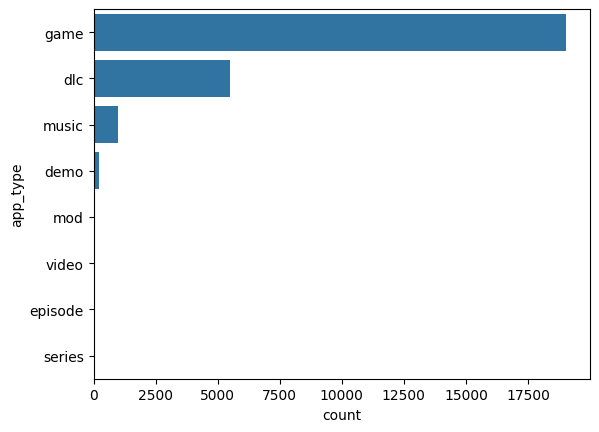

In [8]:
# Create plot of app type.
sns.countplot(info_df, y="app_type")

In [9]:
# Find the counts of each genre
import ast
import collections as col
all_genres = info_df["genres"].dropna().tolist()
all_genres = [ast.literal_eval(gen_list) for gen_list in all_genres]
all_genres_list = [genre for sublist in all_genres for genre in sublist]
all_genres_list_save = all_genres_list.copy()
all_genres_list = list(set(all_genres_list))
col.Counter(all_genres_list_save).most_common()

[('Indie', 16093),
 ('Action', 10491),
 ('Casual', 9668),
 ('Adventure', 9154),
 ('Simulation', 5840),
 ('Strategy', 4780),
 ('RPG', 4562),
 ('Free To Play', 2306),
 ('Early Access', 1875),
 ('Sports', 1296),
 ('Racing', 1062),
 ('Massively Multiplayer', 634),
 ('Utilities', 249),
 ('Design & Illustration', 243),
 ('Web Publishing', 137),
 ('Education', 125),
 ('Animation & Modeling', 117),
 ('Game Development', 110),
 ('Software Training', 57),
 ('Video Production', 56),
 ('Violent', 53),
 ('Audio Production', 38),
 ('Gore', 33),
 ('Photo Editing', 29),
 ('Sexual Content', 20),
 ('Nudity', 19),
 ('Инди', 13),
 ('Симуляторы', 7),
 ('Movie', 5),
 ('Strategie', 4),
 ('Стратегии', 3),
 ('Accounting', 3),
 ('Simülasyon', 3),
 ('Simulationen', 3),
 ('Simuladores', 2),
 ('Экшены', 2),
 ('Ação', 2),
 ('Aventura', 2),
 ('Simulação', 2),
 ('Strateji', 2),
 ('Episodic', 2),
 ('Estrategia', 1),
 ('Ролевые игры', 1),
 ('Estratégia', 1),
 ('Multijogador Massivo', 1),
 ('動作', 1),
 ('Simulatie', 1),


In [10]:
# Create a multi-level list of all genres
all_genres = [[genre for genre in genre_list if genre != "Early Access"] for genre_list in all_genres]
all_genres = [[genre for genre in genre_list if genre != "Free To Play"] for genre_list in all_genres]
all_genres = [["Strategy" if genre == "Strateji" else genre for genre in genre_list] for genre_list in all_genres]
all_genres = [["Simulation" if genre == "Simülasyon" else genre for genre in genre_list] for genre_list in all_genres]

In [11]:
# Flatten the list and get the top 10 genres
flat_genres = [genre for sublist in all_genres for genre in sublist]
genre_counts = col.Counter(flat_genres).most_common()
common_genres = [x[0] for x in genre_counts][:10]
common_genres

['Indie',
 'Action',
 'Casual',
 'Adventure',
 'Simulation',
 'Strategy',
 'RPG',
 'Sports',
 'Racing',
 'Massively Multiplayer']

In [12]:
# Update genres column
gen_series = pd.Series(all_genres)
info_df["genres"] = gen_series
info_df = info_df.dropna(subset="genres")
info_df.isna().sum()

steam_app_id              0
app_type                  0
total_positive_reviews    0
total_negative_reviews    0
genres                    0
total_reviews             0
dtype: int64

In [13]:
info_df.head()

,steam_app_id,app_type,total_positive_reviews,total_negative_reviews,genres,total_reviews
0,2532180,game,1,0,"[Action, Adventure]",1
1,2532230,game,34,15,"[Action, Indie]",49
2,2532300,game,5,0,"[Action, Adventure]",5
3,2532310,game,1,0,"[Casual, Indie]",1
4,2532360,game,3,1,"[Casual, Indie, Strategy]",4


In [14]:
# Make copy of info dataframe
expanded_info = info_df.copy()
expanded_info.isna().sum()

steam_app_id              0
app_type                  0
total_positive_reviews    0
total_negative_reviews    0
genres                    0
total_reviews             0
dtype: int64

In [15]:
# Create columns for each genre. If that genre exists, that column is 1, else 0
for genre in common_genres:
    info_df[genre] = 0
    info_df[genre] = info_df["genres"].apply(lambda x: 1 if genre in x else 0)
info_df.head()

,steam_app_id,app_type,total_positive_reviews,total_negative_reviews,genres,total_reviews,Indie,Action,Casual,Adventure,Simulation,Strategy,RPG,Sports,Racing,Massively Multiplayer
0,2532180,game,1,0,"[Action, Adventure]",1,0,1,0,1,0,0,0,0,0,0
1,2532230,game,34,15,"[Action, Indie]",49,1,1,0,0,0,0,0,0,0,0
2,2532300,game,5,0,"[Action, Adventure]",5,0,1,0,1,0,0,0,0,0,0
3,2532310,game,1,0,"[Casual, Indie]",1,1,0,1,0,0,0,0,0,0,0
4,2532360,game,3,1,"[Casual, Indie, Strategy]",4,1,0,1,0,0,1,0,0,0,0


In [16]:
# Drop orginal genre column
info_df = info_df.drop("genres", axis=1)

In [17]:
# Only look at apps with between 50 and 250 reviews
red_info_df = info_df[info_df["total_reviews"] >= 50]
red_info_df

,steam_app_id,app_type,total_positive_reviews,total_negative_reviews,total_reviews,Indie,Action,Casual,Adventure,Simulation,Strategy,RPG,Sports,Racing,Massively Multiplayer
5,2532370,dlc,64,24,88,0,0,0,1,1,0,0,1,0,0
6,2532430,game,173,71,244,1,1,0,1,0,0,0,0,0,0
10,2532550,game,697,66,763,1,1,0,1,0,0,0,0,0,1
31,2531290,dlc,350,12,362,1,1,0,0,0,0,0,0,0,0
34,2531370,game,64,14,78,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24759,715191,dlc,281,45,326,1,0,0,1,0,1,0,0,0,0
24760,715192,dlc,151,31,182,0,1,0,0,0,1,0,0,0,0
24761,715193,dlc,53,7,60,0,1,0,0,0,1,0,0,0,0
24762,715194,dlc,280,145,425,0,1,0,0,0,1,0,0,0,0


In [18]:
# Make column names lower case
games_df = red_info_df[red_info_df["app_type"] == "game"]
games_df.columns = [x.lower().replace(" ", "_") for x in games_df.columns]
games_df

,steam_app_id,app_type,total_positive_reviews,total_negative_reviews,total_reviews,indie,action,casual,adventure,simulation,strategy,rpg,sports,racing,massively_multiplayer
6,2532430,game,173,71,244,1,1,0,1,0,0,0,0,0,0
10,2532550,game,697,66,763,1,1,0,1,0,0,0,0,0,1
34,2531370,game,64,14,78,1,0,0,0,0,0,0,0,0,0
45,2530670,game,285,18,303,0,0,0,0,0,0,1,0,0,1
55,2530890,game,45,8,53,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24745,715560,game,3094,340,3434,0,0,0,0,0,1,0,0,0,0
24746,715580,game,90,5,95,0,0,0,1,0,0,0,0,0,0
24749,715010,game,283,13,296,1,1,1,0,0,0,0,0,0,0
24751,715050,game,125,56,181,1,1,1,1,0,0,0,0,0,0


In [19]:
# Save data frame to a csv
games_df.to_csv("./DataMiningProjectData/processed_games_info.csv")

In [20]:
# Create dataframe of the positive games
positive_games_df = pd.read_csv("./DataMiningProjectData/processed_games_info.csv").drop(["Unnamed: 0", "app_type"], axis=1)
positive_games_df = positive_games_df[positive_games_df["total_positive_reviews"] >= positive_games_df["total_negative_reviews"]]
positive_games_df

,steam_app_id,total_positive_reviews,total_negative_reviews,total_reviews,indie,action,casual,adventure,simulation,strategy,rpg,sports,racing,massively_multiplayer
0,2532430,173,71,244,1,1,0,1,0,0,0,0,0,0
1,2532550,697,66,763,1,1,0,1,0,0,0,0,0,1
2,2531370,64,14,78,1,0,0,0,0,0,0,0,0,0
3,2530670,285,18,303,0,0,0,0,0,0,1,0,0,1
4,2530890,45,8,53,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,715560,3094,340,3434,0,0,0,0,0,1,0,0,0,0
3721,715580,90,5,95,0,0,0,1,0,0,0,0,0,0
3722,715010,283,13,296,1,1,1,0,0,0,0,0,0,0
3723,715050,125,56,181,1,1,1,1,0,0,0,0,0,0


In [21]:
# create dataframe of the negative games
negative_games_df = pd.read_csv("./DataMiningProjectData/processed_games_info.csv").drop(["Unnamed: 0", "app_type"], axis=1)
negative_games_df = negative_games_df[negative_games_df["total_positive_reviews"] < negative_games_df["total_negative_reviews"]]
negative_games_df

,steam_app_id,total_positive_reviews,total_negative_reviews,total_reviews,indie,action,casual,adventure,simulation,strategy,rpg,sports,racing,massively_multiplayer
21,2519060,2056,4946,7002,0,0,0,0,0,1,1,0,0,0
112,2468610,25,26,51,0,0,1,0,0,0,0,0,0,0
138,2452090,165,179,344,0,1,1,0,0,0,0,0,0,0
140,2452260,29,39,68,0,0,1,0,1,0,1,0,0,0
141,2452310,30,49,79,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,726070,17,67,84,0,0,0,0,1,0,0,0,0,0
3653,723100,28,36,64,1,1,0,0,0,0,0,0,0,0
3675,719590,66,332,398,1,0,1,1,0,0,0,0,0,0
3680,718790,72,76,148,1,0,0,1,0,0,0,0,0,0


In [22]:
# Get reviews associated with positively reviewed games
positive_app_ids = positive_games_df["steam_app_id"].tolist()
positive_games_reviews = review_df[review_df["steam_app_id"].isin(positive_app_ids)].dropna()
positive_games_reviews = positive_games_reviews[positive_games_reviews["playtime_at_review"] >= 120]
positive_games_reviews

,steam_app_id,playtime_at_review,review
148,2532430,127.0,"I wouldn't say it was amazing , i'd say it was..."
149,2532430,217.0,This game is everything but normal...
151,2532430,124.0,Its better than supernatural
152,2532430,164.0,"Supernormal is initially quite striking, but i..."
154,2532430,406.0,\n\nThe game was very well made and is very am...
...,...,...,...
4393852,715310,464.0,This game has always had a special place in my...
4393855,715310,341.0,Nostalgia's kicking in
4393859,715310,337.0,The game doesn't run smoothly. They didn't fix...
4393860,715310,14455.0,"This is not the UR i know anymore, its no fun ..."


In [23]:
# Get reviews associated with negatively reviewed games
negative_app_ids = negative_games_df["steam_app_id"].tolist()
negative_games_reviews = review_df[review_df["steam_app_id"].isin(negative_app_ids)].dropna()
negative_games_reviews = negative_games_reviews[negative_games_reviews["playtime_at_review"] >= 120]
negative_games_reviews

,steam_app_id,playtime_at_review,review
53791,2468610,398.0,⠀
53792,2468610,139.0,"If you hate mannequins, its the perfect horror..."
53793,2468610,5969.0,⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠀⠀⠀⠀\r\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀...
53794,2468610,222.0,really good at catching you off guard.
53797,2468610,365.0,Scary game
...,...,...,...
4371809,719120,161.0,"Asset flip, or not asset flip.. I still have t..."
4371810,719120,571.0,"The ""game"" itself isn't so terrible, in that i..."
4371811,719120,301.0,[h1][b] is this a game? [b]
4371812,719120,174.0,Asset flip with tons of achievements that don'...


In [24]:
positive_games_df = pd.read_csv("./DataMiningProjectData/processed_games_info.csv").drop(["Unnamed: 0", "app_type"], axis=1)
positive_games_df = positive_games_df[positive_games_df["total_positive_reviews"] >= positive_games_df["total_negative_reviews"]]

positive_games_reviews = review_df[review_df["steam_app_id"].isin(positive_app_ids)].dropna()
positive_games_reviews = positive_games_reviews[positive_games_reviews["playtime_at_review"] >= 120]

pos_game_review_dict = {}
for col in common_genres:
    # Fix column
    col = col.lower().replace(" ", "_")
    
    # Save all positive games with the given genre
    df = positive_games_df[positive_games_df[col.lower().replace(" ", "_")] == 1]
    
    # Get all app ids from the positive list
    app_ids = df["steam_app_id"].tolist()
    
    # Get reviews for specific genre
    reviews = positive_games_reviews[positive_games_reviews["steam_app_id"].isin(app_ids)]
    pos_game_review_dict[col] = reviews
    print(col, len(df), len(reviews))
    
for key in pos_game_review_dict.keys():
    pos_game_review_dict[key].to_csv(f"./DataMiningProjectData/grouped-text/liked-games/liked-{key}.csv")

indie 2351 2125664
action 1583 1480742
casual 1328 1220734
adventure 1367 1077544
simulation 829 708477
strategy 684 477110
rpg 677 691281
sports 198 327416
racing 159 212423
massively_multiplayer 67 28024


In [25]:
negative_games_df = pd.read_csv("./DataMiningProjectData/processed_games_info.csv").drop(["Unnamed: 0", "app_type"], axis=1)
negative_games_df = negative_games_df[negative_games_df["total_positive_reviews"] < negative_games_df["total_negative_reviews"]]

negative_games_reviews = review_df[review_df["steam_app_id"].isin(negative_app_ids)].dropna()
negative_games_reviews = negative_games_reviews[negative_games_reviews["playtime_at_review"] >= 120]

neg_game_review_dict = {}
for col in common_genres:
    # Fix column
    col = col.lower().replace(" ", "_")
    
    # Save all positive games with the given genre
    df = negative_games_df[negative_games_df[col.lower().replace(" ", "_")] == 1]
    
    # Get all app ids from the positive list
    app_ids = df["steam_app_id"].tolist()
    
    # Get reviews for specific genre
    reviews = negative_games_reviews[negative_games_reviews["steam_app_id"].isin(app_ids)]
    neg_game_review_dict[col] = reviews
    print(col, len(df), len(reviews))
    
for key in neg_game_review_dict.keys():
    neg_game_review_dict[key].to_csv(f"./DataMiningProjectData/grouped-text/disliked-games/disliked-{key}.csv")

indie 72 16517
action 49 10132
casual 49 15790
adventure 40 22363
simulation 23 1206
strategy 21 3701
rpg 17 1177
sports 5 220
racing 7 323
massively_multiplayer 3 141


In [26]:
games_df

,steam_app_id,app_type,total_positive_reviews,total_negative_reviews,total_reviews,indie,action,casual,adventure,simulation,strategy,rpg,sports,racing,massively_multiplayer
6,2532430,game,173,71,244,1,1,0,1,0,0,0,0,0,0
10,2532550,game,697,66,763,1,1,0,1,0,0,0,0,0,1
34,2531370,game,64,14,78,1,0,0,0,0,0,0,0,0,0
45,2530670,game,285,18,303,0,0,0,0,0,0,1,0,0,1
55,2530890,game,45,8,53,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24745,715560,game,3094,340,3434,0,0,0,0,0,1,0,0,0,0
24746,715580,game,90,5,95,0,0,0,1,0,0,0,0,0,0
24749,715010,game,283,13,296,1,1,1,0,0,0,0,0,0,0
24751,715050,game,125,56,181,1,1,1,1,0,0,0,0,0,0


In [36]:
import csv
from nltk.corpus import stopwords
import string

sample_size = 10000

numbers = "0123456789"


remove_list = ["", "game", "games", "ever", "it", "one", "really", "get", "it", "would", "much", "even", 
              "still", "im", "also", "way", "lot", "ive", "something", "mass", "effect", "resident", "evil", "time",
              "like", "good", "bad", "great", "silent", "hill", "recommend", "highly", "played", "going", "play",
              "k", "fun", "survival", "could", "make", "drawn", "drawing", "early", "access", "idle", "text", "ai",
               "play", "first", "two", "one", "go", "back", "give", "though", "things", "thing", "animals", "water", 
               "instincts", "bears", "species", "animal", "without", "think", "country", "open", "thats", "worth",
               "feels", "battlefront", "fun", "playing", "better", "people", "see", "k"]

# remove_list += app_names
# remove_list = list(set(remove_list))

stop = stopwords.words("english")

positive_check = {}
for col in common_genres:
    print(f"Working on {col}")
    # Fix column
    col = col.lower().replace(" ", "_")
    
    games = pd.read_csv(f"./DataMiningProjectData/grouped-text/liked-games/liked-{col}.csv").drop(["Unnamed: 0", "steam_app_id", "playtime_at_review"], axis=1)
    if len(games) > sample_size:
        sample = games.sample(sample_size)
    else:
        sample = games
    action_reviews = [review.replace("\n", "").replace("\r", "") for review in sample["review"].tolist()]
    action_reviews = [review for review in action_reviews]
    action_reviews = [review.split() for review in action_reviews]
    action_reviews = [[word.lower() for word in review if word.lower() not in stop] for review in action_reviews]
    action_reviews = [[word.translate(str.maketrans("", "", string.punctuation)) for word in review]
                         for review in action_reviews]
    action_reviews = [[word.translate(str.maketrans("", "", numbers)) for word in review]
                         for review in action_reviews]
    action_reviews = [["game" if word == "games" else word for word in review] 
                          for review in action_reviews]
    action_reviews = [[word for word in review if word not in remove_list] 
                          for review in action_reviews]
    action_reviews = [list(set(review)) for review in action_reviews]
    action_reviews = [[word for word in review if word.isascii()]
                        for review in action_reviews]

#     flat_action = [word for review in action_reviews for word in review]
#     counts = col.Counter(flat_action).most_common()
    action_reviews = [review for review in action_reviews if len(review) > 0]
    
    positive_check[col] = action_reviews
    with open(f"./DataMiningProjectData/grouped-text/transactions/t-liked-{col}.csv", "w") as f:
        writer = csv.writer(f, delimiter=",")
        writer.writerows(action_reviews)

Working on Indie
Working on Action
Working on Casual
Working on Adventure
Working on Simulation
Working on Strategy
Working on RPG
Working on Sports
Working on Racing
Working on Massively Multiplayer


In [37]:
negative_check = {}
for col in common_genres:
    print(f"Working on {col}")
    # Fix column
    col = col.lower().replace(" ", "_")
    
    games = pd.read_csv(f"./DataMiningProjectData/grouped-text/disliked-games/disliked-{col}.csv").drop(["Unnamed: 0", "steam_app_id", "playtime_at_review"], axis=1)
    if len(games) > sample_size:
        sample = games.sample(sample_size)
    else:
        sample = games
    action_reviews = [review.replace("\n", "").replace("\r", "") for review in sample["review"].tolist()]
    action_reviews = [review for review in action_reviews]
    action_reviews = [review.split() for review in action_reviews]
    action_reviews = [[word.lower() for word in review if word.lower() not in stop] for review in action_reviews]
    action_reviews = [[word.translate(str.maketrans("", "", string.punctuation)) for word in review]
                         for review in action_reviews]
    action_reviews = [[word.translate(str.maketrans("", "", numbers)) for word in review]
                         for review in action_reviews]
    action_reviews = [["game" if word == "games" else word for word in review] 
                          for review in action_reviews]
    action_reviews = [[word for word in review if word not in remove_list] 
                          for review in action_reviews]
    action_reviews = [review for review in action_reviews if len(review) >= 10]
    action_reviews = [list(set(review)) for review in action_reviews]
    action_reviews = [[word for word in review if word.isascii()]
                         for review in action_reviews]


#     flat_action = [word for review in action_reviews for word in review]
#     counts = col.Counter(flat_action).most_common()
    
    negative_check[col] = action_reviews
    with open(f"./DataMiningProjectData/grouped-text/transactions/t-disliked-{col}.csv", "w") as f:
        writer = csv.writer(f, delimiter=",")
        writer.writerows(action_reviews)

Working on Indie
Working on Action
Working on Casual
Working on Adventure
Working on Simulation
Working on Strategy
Working on RPG
Working on Sports
Working on Racing
Working on Massively Multiplayer
